# Cellular Automata Rules

This document looks at one-dimensional cellular automata under certain rules.

In [1]:
NEIGHBOURHOOD = 1

## Automaton source

This header contains the source code that generates a picture.

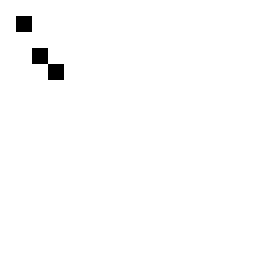

In [20]:
from PIL import Image, ImageOps

def create_image(pixels, width=16, height=16):
    img = Image.new(mode="RGB", size=(width, height))
    
    for x, y in pixels:
        img.load()[x, y] = (255, 255, 255)
    
    img = ImageOps.invert(img)
    return img.resize((16*width, 16*height), resample=Image.NEAREST)


create_image([(1, 1), (2, 3), (3, 4)])

In [38]:
class CA:
    """
        Create a cellular automaton that works with a certain ruleset.
    """
    def __init__(self, rule, width, height):
        self.rule = rule
        self.height = 2*height+1
        self.width  = 2*width +1
    
        self.generations = []
        self.nodes = []
        
        current = None
        for i in range(height):
            current = Generation(rule, current)
    
            self.generations.append(current)
            for j in range(-1*width, width+1):
                for cell, value in current.nodes:
                    if cell == j:
                        if value == '1':
                            self.nodes.append((i+1, j+width+1))
                        break
                else:
                    if current.others == 1:
                        self.nodes.append((i+1, j+width+1))
    
    def show(self):
        """Create an image of this CA."""
        return create_image(self.nodes, self.width, self.height)

class Generation:
    def __init__(self, rule, parent=None):
        """Calculate a new generation based on a ruleset."""
        self.parent = parent
        self.rule = bin(rule)[2:].zfill(2**(2*NEIGHBOURHOOD+1))
        
        if parent is None:
            self.nodes = [(0, '1')]
            self.others = 0
        else:
            self.nodes = [(i, self.get_new_spot(i)) 
                           for i in range(
                            min([x[0] for x in self.parent.nodes])-1, 
                            max([x[0] for x in self.parent.nodes])+2)
                         ]
            self.trim_nodes()
            self.others = int(self.rule[0])
    
    def get_spot(self, num):
        """Get the state from a cell from the parent's generation."""
        if min([x[0] for x in self.parent.nodes]) <= num <= max([x[0] for x in self.parent.nodes]):
            return int(num in self.parent.nodes)
        else:
            return self.parent.others

    def get_new_spot(self, num):
        """Determine the new spot"""
        case = ""
        for i in range(-1*NEIGHBOURHOOD, NEIGHBOURHOOD+1):
            case += str(self.get_spot(num+i))
        
        return self.rule[int(case, 2)]

    def trim_nodes(self):
        """Keep the array small and clean for quicker calculation."""
        pass


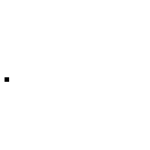


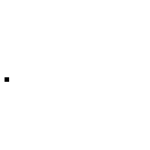

In [41]:
import ipyplot

ipyplot.plot_images([CA(127, 16, 16).show()])